# Universidad Internacional de Valencia
## Redes Neuronales y Deep Learning
### Proyecto de programación

---
Descripción del conjunto de datos
 
---


* El "Vegetable Image Dataset" de misrakahmed en Kaggle es un recurso valioso para la clasificación de imágenes de diversas verduras. Este conjunto de datos contiene una amplia variedad de imágenes organizadas por categorías, cada una representando un tipo específico de verdura. Con una cantidad significativa de imágenes, proporciona una base sólida para entrenar modelos de aprendizaje automático, permitiendo la identificación y clasificación precisa de estos productos.

* Diseñado para aplicaciones de visión por computadora, este dataset es ideal para tareas como la clasificación automática en supermercados o la detección de verduras en aplicaciones móviles. Las imágenes suelen estar en formatos comunes y tienen resoluciones adecuadas para el entrenamiento de modelos de aprendizaje profundo.

---
Librerías necesarias

---

In [ ]:
import os  # Proporciona funcionalidades para interactuar con el sistema operativo.
import pandas as pd  # Usada para manipulación y análisis de datos, especialmente con estructuras tabulares.
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones.
import matplotlib.image as mpimg  # Para leer y mostrar imágenes en gráficos de Matplotlib.
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Para aumentar y preprocesar imágenes para entrenamiento.
import tensorflow as tf  # Biblioteca principal para aprendizaje automático y redes neuronales.
from tensorflow.keras import layers, models  # Para construir redes neuronales mediante capas y modelos.
from tensorflow.keras.applications import VGG16, ResNet50  # Modelos preentrenados para transfer learning en clasificación de imágenes.
from tensorflow.keras.optimizers import Adam  # Optimizador Adam para mejorar el aprendizaje.
from tensorflow.keras.callbacks import EarlyStopping  # Callback para detener el entrenamiento temprano si no hay mejora.

--- 
Cargue de información

---

In [ ]:


# Definir la ruta base
base_path = r'C:\Users\jose\Downloads\archive\Vegetable'  # Ruta a la carpeta "Vegetable"

# Inicializar diccionarios para almacenar DataFrames
dataframes = {}

# Listar conjuntos de datos
for set_type in ['train', 'test', 'validation']:
    set_path = os.path.join(base_path, set_type)

    # Verificar si la ruta existe
    if not os.path.exists(set_path):
        print(f"Ruta no encontrada: {set_path}")
        continue

    # Inicializar listas para almacenar los datos
    image_files = []
    labels = []

    # Recorrer las carpetas de categorías
    for category in os.listdir(set_path):
        category_path = os.path.join(set_path, category)
        
        # Asegurarse de que sea una carpeta
        if os.path.isdir(category_path):
            for filename in os.listdir(category_path):
                # Verificar si el archivo es una imagen (opcional)
                if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
                    image_files.append(os.path.join(category_path, filename))  # Ruta completa del archivo
                    labels.append(category)  # Usar el nombre de la subcarpeta como etiqueta

    # Crear un DataFrame para el conjunto actual
    df = pd.DataFrame({'filename': image_files, 'label': labels})
    dataframes[set_type] = df  # Guardar el DataFrame en el diccionario

    # Mostrar las primeras filas del DataFrame
    print(f"DataFrame para {set_type}:")
    print(df.head(), "\n")

# Acceder a los DataFrames
train_df = dataframes.get('train', pd.DataFrame())
test_df = dataframes.get('test', pd.DataFrame())
validation_df = dataframes.get('validation', pd.DataFrame())

# Comprobar el tamaño de los DataFrames
print(f"Tamaño del DataFrame de entrenamiento: {train_df.shape}")
print(f"Tamaño del DataFrame de prueba: {test_df.shape}")
print(f"Tamaño del DataFrame de validación: {validation_df.shape}")


DataFrame para train:
                                            filename label
0  C:\Users\jose\Downloads\archive\Vegetable\trai...  Bean
1  C:\Users\jose\Downloads\archive\Vegetable\trai...  Bean
2  C:\Users\jose\Downloads\archive\Vegetable\trai...  Bean
3  C:\Users\jose\Downloads\archive\Vegetable\trai...  Bean
4  C:\Users\jose\Downloads\archive\Vegetable\trai...  Bean 

DataFrame para test:
                                            filename label
0  C:\Users\jose\Downloads\archive\Vegetable\test...  Bean
1  C:\Users\jose\Downloads\archive\Vegetable\test...  Bean
2  C:\Users\jose\Downloads\archive\Vegetable\test...  Bean
3  C:\Users\jose\Downloads\archive\Vegetable\test...  Bean
4  C:\Users\jose\Downloads\archive\Vegetable\test...  Bean 

DataFrame para validation:
                                            filename label
0  C:\Users\jose\Downloads\archive\Vegetable\vali...  Bean
1  C:\Users\jose\Downloads\archive\Vegetable\vali...  Bean
2  C:\Users\jose\Downloads\archive\Vegeta

---
Muestra $n=5$ conjunto de datos de entrenamiento

---

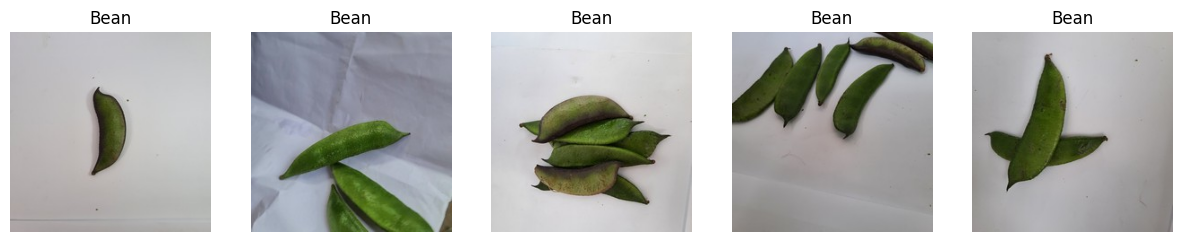

In [ ]:
# Imprimir 5 imágenes del conjunto de test
plt.figure(figsize=(15, 10))
for i in range(5):
    img_path = os.path.join(base_path, 'train', train_df['filename'][i])
    img = mpimg.imread(img_path)
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(test_df['label'][i])
    plt.axis('off')  # No mostrar ejes

plt.show()

---
Muestra $n=5$ conjunto de datos de testeo

---

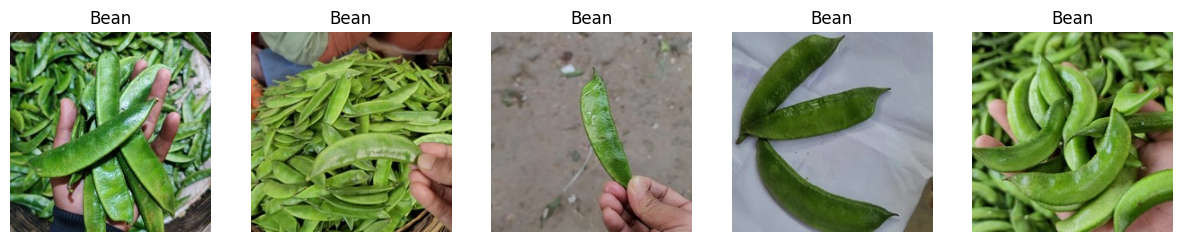

In [5]:
# Imprimir 5 imágenes del conjunto de test
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(15, 10))
for i in range(5):
    img_path = os.path.join(base_path, 'test', test_df['filename'][i])
    img = mpimg.imread(img_path)
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(test_df['label'][i])
    plt.axis('off')  # No mostrar ejes

plt.show()

---
Muestra $n=5$ conjunto de datos de validación

---

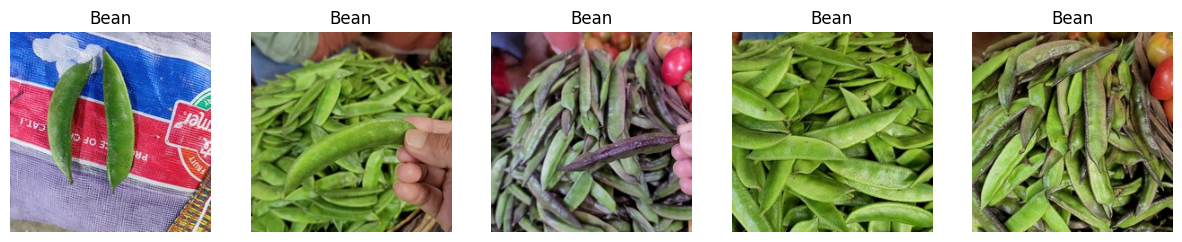

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(5):
    img_path = os.path.join(base_path, 'validation', validation_df['filename'][i])
    img = mpimg.imread(img_path)
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(test_df['label'][i])
    plt.axis('off')  # No mostrar ejes

plt.show()

In [ ]:
# Definir parámetros de augmentación para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Definir solo normalización para los conjuntos de prueba y validación
test_datagen = ImageDataGenerator(rescale=1./255)

# Generar datos para el conjunto de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/Vegetable Images/train',  # Cambiar esto si es necesario
    x_col='filename',
    y_col='label',
    class_mode='categorical',
    target_size=(150, 150),
    batch_size=32
)

# Generar datos para el conjunto de validación
validation_generator = test_datagen.flow_from_dataframe(
    dataframe=validation_df,
    directory='/content/Vegetable Images/validation',  # Cambiar esto si es necesario
    x_col='filename',
    y_col='label',
    class_mode='categorical',
    target_size=(150, 150),
    batch_size=32
)

# Generar datos para el conjunto de test
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='/content/Vegetable Images/test',  # Cambiar esto si es necesario
    x_col='filename',
    y_col='label',
    class_mode='categorical',
    target_size=(150, 150),
    batch_size=32
)


Found 15000 validated image filenames belonging to 15 classes.
Found 3000 validated image filenames belonging to 15 classes.
Found 3000 validated image filenames belonging to 15 classes.


--- 
Definición de arquitectura CNNs

---

In [ ]:

# Definición del modelo secuencial
model = models.Sequential([

    # Primera capa convolucional: 32 filtros de 3x3, activación ReLU, entrada de 150x150x3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    
    # Capa de max pooling: reduce la dimensión de la salida anterior
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Segunda capa convolucional: 64 filtros de 3x3, activación ReLU
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Otra capa de max pooling
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Tercera capa convolucional: 128 filtros de 3x3, activación ReLU
    layers.Conv2D(128, (3, 3), activation='relu'),
    
    # Otra capa de max pooling
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Aplanar la salida 2D a un vector unidimensional
    layers.Flatten(),
    
    # Capa densa con 128 neuronas y activación ReLU
    layers.Dense(128, activation='relu'),
    
    # Capa de dropout: desactiva el 50% de las neuronas para prevenir sobreajuste
    layers.Dropout(0.5),
    
    # Capa de salida: neuronas igual al número de clases, activación softmax
    layers.Dense(len(train_df['label'].unique()), activation='softmax')
])


# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\jose\miniconda3\envs\full\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---
Esquema CNNs

---

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,830,287 (18.43 MB)

 Trainable params: 4,830,287 (18.43 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=2,
    verbose=1  # Cambiar a 1 para imprimir los resultados por cada época
)

c:\Users\jose\miniconda3\envs\full\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2581 - loss: 2.2165

c:\Users\jose\miniconda3\envs\full\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 793s 2s/step - accuracy: 0.2583 - loss: 2.2159 - val_accuracy: 0.5720 - val_loss: 1.2270
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


c:\Users\jose\miniconda3\envs\full\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


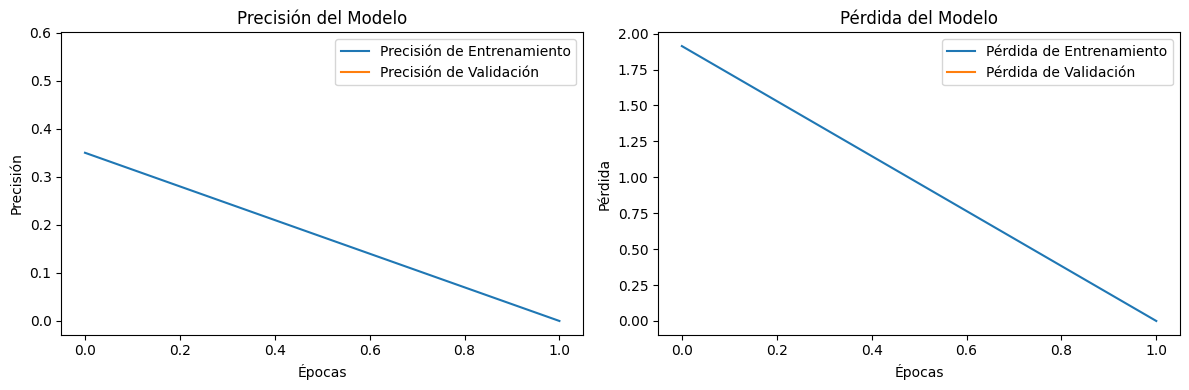

In [ ]:
# Graficar la precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, 1ª gráfica
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar la pérdida
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, 2ª gráfica
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 39s 413ms/step - accuracy: 0.5794 - loss: 1.2217
Test accuracy: 0.58


# Estrategia 2: Red pre-entrenada

In [ ]:
# Cargar VGG16 preentrenado
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar las capas de VGG16
for layer in vgg_model.layers:
    layer.trainable = False

# Crear modelo secuencial
vgg_model_final = Sequential([
    vgg_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Regularización
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Capa de salida
])

# Compilar modelo
vgg_model_final.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])




In [20]:
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Cargar ResNet50 preentrenado
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar las capas de ResNet50
for layer in resnet_model.layers:
    layer.trainable = False

# Crear modelo secuencial
resnet_model_final = Sequential([
    resnet_model,
    layers.Flatten(),  # Asegúrate de usar layers.Flatten()
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Regularización
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Capa de salida
])

# Compilar modelo
resnet_model_final.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])




In [24]:
# Resumen del modelo
resnet_model_final.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,699,023 (140.00 MB)

 Trainable params: 13,111,311 (50.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Callback para detener el entrenamiento temprano


early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Entrenar VGG16
vgg_history = vgg_model_final.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=2,
    callbacks=[early_stopping]
)

# Entrenar ResNet50
resnet_history = resnet_model_final.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=2,
    callbacks=[early_stopping]
)


Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 5885s 13s/step - accuracy: 0.4913 - loss: 1.6388 - val_accuracy: 0.9097 - val_loss: 0.3786
Epoch 2/2


c:\Users\jose\miniconda3\envs\full\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 93ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


c:\Users\jose\miniconda3\envs\full\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 2233s 5s/step - accuracy: 0.0759 - loss: 2.7477 - val_accuracy: 0.1033 - val_loss: 2.6516
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [28]:
# Evaluar VGG16
vgg_score = vgg_model_final.evaluate(validation_generator)
print(f'VGG16 - Pérdida: {vgg_score[0]}, Precisión: {vgg_score[1]}')

# Evaluar ResNet50
resnet_score = resnet_model_final.evaluate(validation_generator)
print(f'ResNet50 - Pérdida: {resnet_score[0]}, Precisión: {resnet_score[1]}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 845s 9s/step - accuracy: 0.9049 - loss: 0.3909
VGG16 - Pérdida: 0.37859660387039185, Precisión: 0.9096666574478149
94/94 ━━━━━━━━━━━━━━━━━━━━ 387s 4s/step - accuracy: 0.1074 - loss: 2.6544
ResNet50 - Pérdida: 2.6516385078430176, Precisión: 0.10333333164453506


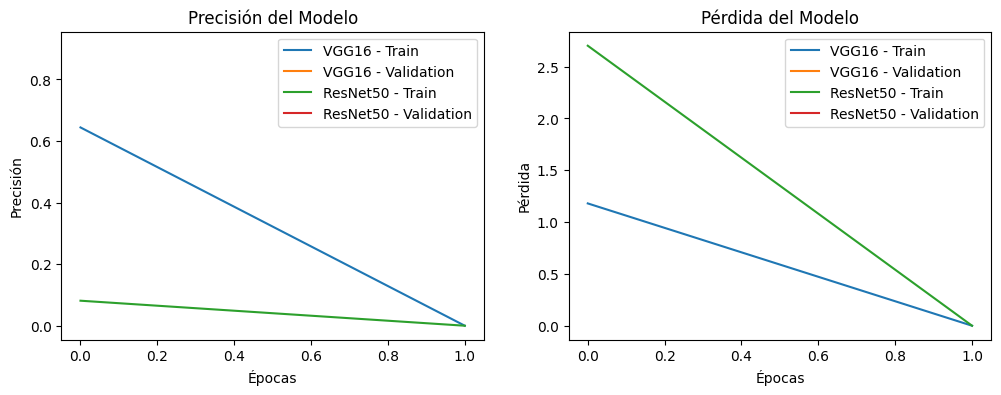

In [29]:
import matplotlib.pyplot as plt

# Graficar la precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['accuracy'], label='VGG16 - Train')
plt.plot(vgg_history.history['val_accuracy'], label='VGG16 - Validation')
plt.plot(resnet_history.history['accuracy'], label='ResNet50 - Train')
plt.plot(resnet_history.history['val_accuracy'], label='ResNet50 - Validation')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar la pérdida
plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['loss'], label='VGG16 - Train')
plt.plot(vgg_history.history['val_loss'], label='VGG16 - Validation')
plt.plot(resnet_history.history['loss'], label='ResNet50 - Train')
plt.plot(resnet_history.history['val_loss'], label='ResNet50 - Validation')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()